In [33]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers , models
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [34]:
X = np.load('X_train.npy')
y = np.load('y_train.npy')

In [35]:
X_train , X_val , y_train , y_val = train_test_split(X , y , test_size=0.2 , random_state=42)
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
y_train = y_train.astype('float32') / 96.0
y_val = y_val.astype('float32') / 96.0

In [36]:
print(X_train.shape , y_train.shape)
print(X_val.shape , y_val.shape)

(1712, 9216) (1712, 30)
(428, 9216) (428, 30)


In [37]:
def get_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(9216,)))
    model.add(layers.Reshape((96, 96, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(30))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    
    return model

In [38]:
model = get_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 96, 96, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │         7,710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,377,438 (12.88 MB)

 Trainable params: 3,377,438 (12.88 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_mae' , patience=5 , restore_best_weights=True),
]

history = model.fit(X_train , y_train , epochs=200 , batch_size=64 , validation_data=(X_val , y_val) , callbacks=callbacks)

model.save('facial_recog.keras')

Epoch 1/200


2025-04-20 00:31:58.507697: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_833', 12 bytes spill stores, 12 bytes spill loads



24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1089 - mae: 0.2603

2025-04-20 00:32:01.709352: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_964', 48 bytes spill stores, 48 bytes spill loads



27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - loss: 0.1019 - mae: 0.2500 - val_loss: 0.0120 - val_mae: 0.0866
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0187 - mae: 0.1080 - val_loss: 0.0024 - val_mae: 0.0382
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0103 - mae: 0.0802 - val_loss: 0.0015 - val_mae: 0.0295
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0080 - mae: 0.0707 - val_loss: 0.0012 - val_mae: 0.0251
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0067 - mae: 0.0642 - val_loss: 0.0014 - val_mae: 0.0285
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0059 - mae: 0.0603 - val_loss: 0.0010 - val_mae: 0.0235
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0055 - mae: 0.0581 - val_loss: 0.0010 - val_mae: 0.0236
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0052 - mae: 0.0563 - val_loss: 0.0012 - val_mae: 0.0258
Epoch 9/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0045 

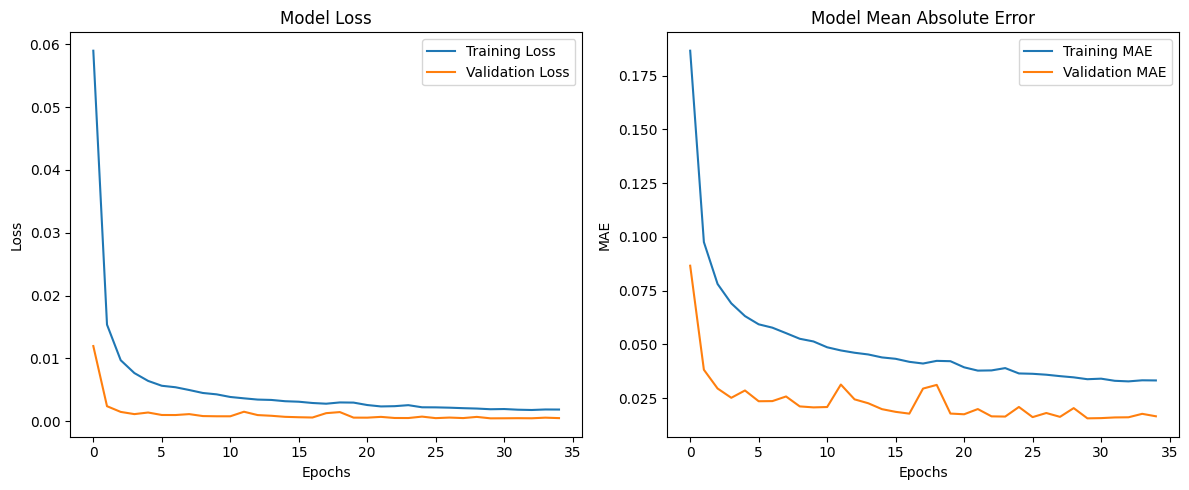

In [40]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
X_test = np.load('X_test.npy')
X_test = X_test.astype('float32') / 255

pred = model.predict(X_test)
pred[1]

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


array([0.70129955, 0.37586957, 0.30010664, 0.3920924 , 0.61898464,
       0.3885012 , 0.7765428 , 0.38563928, 0.37400737, 0.38623   ,
       0.22495984, 0.39990494, 0.5947557 , 0.31633794, 0.83467525,
       0.3020774 , 0.39292902, 0.31674027, 0.1550161 , 0.31869552,
       0.49753848, 0.6154036 , 0.6764478 , 0.79675853, 0.35194245,
       0.81246436, 0.51729524, 0.7771621 , 0.5106807 , 0.88626873],
      dtype=float32)

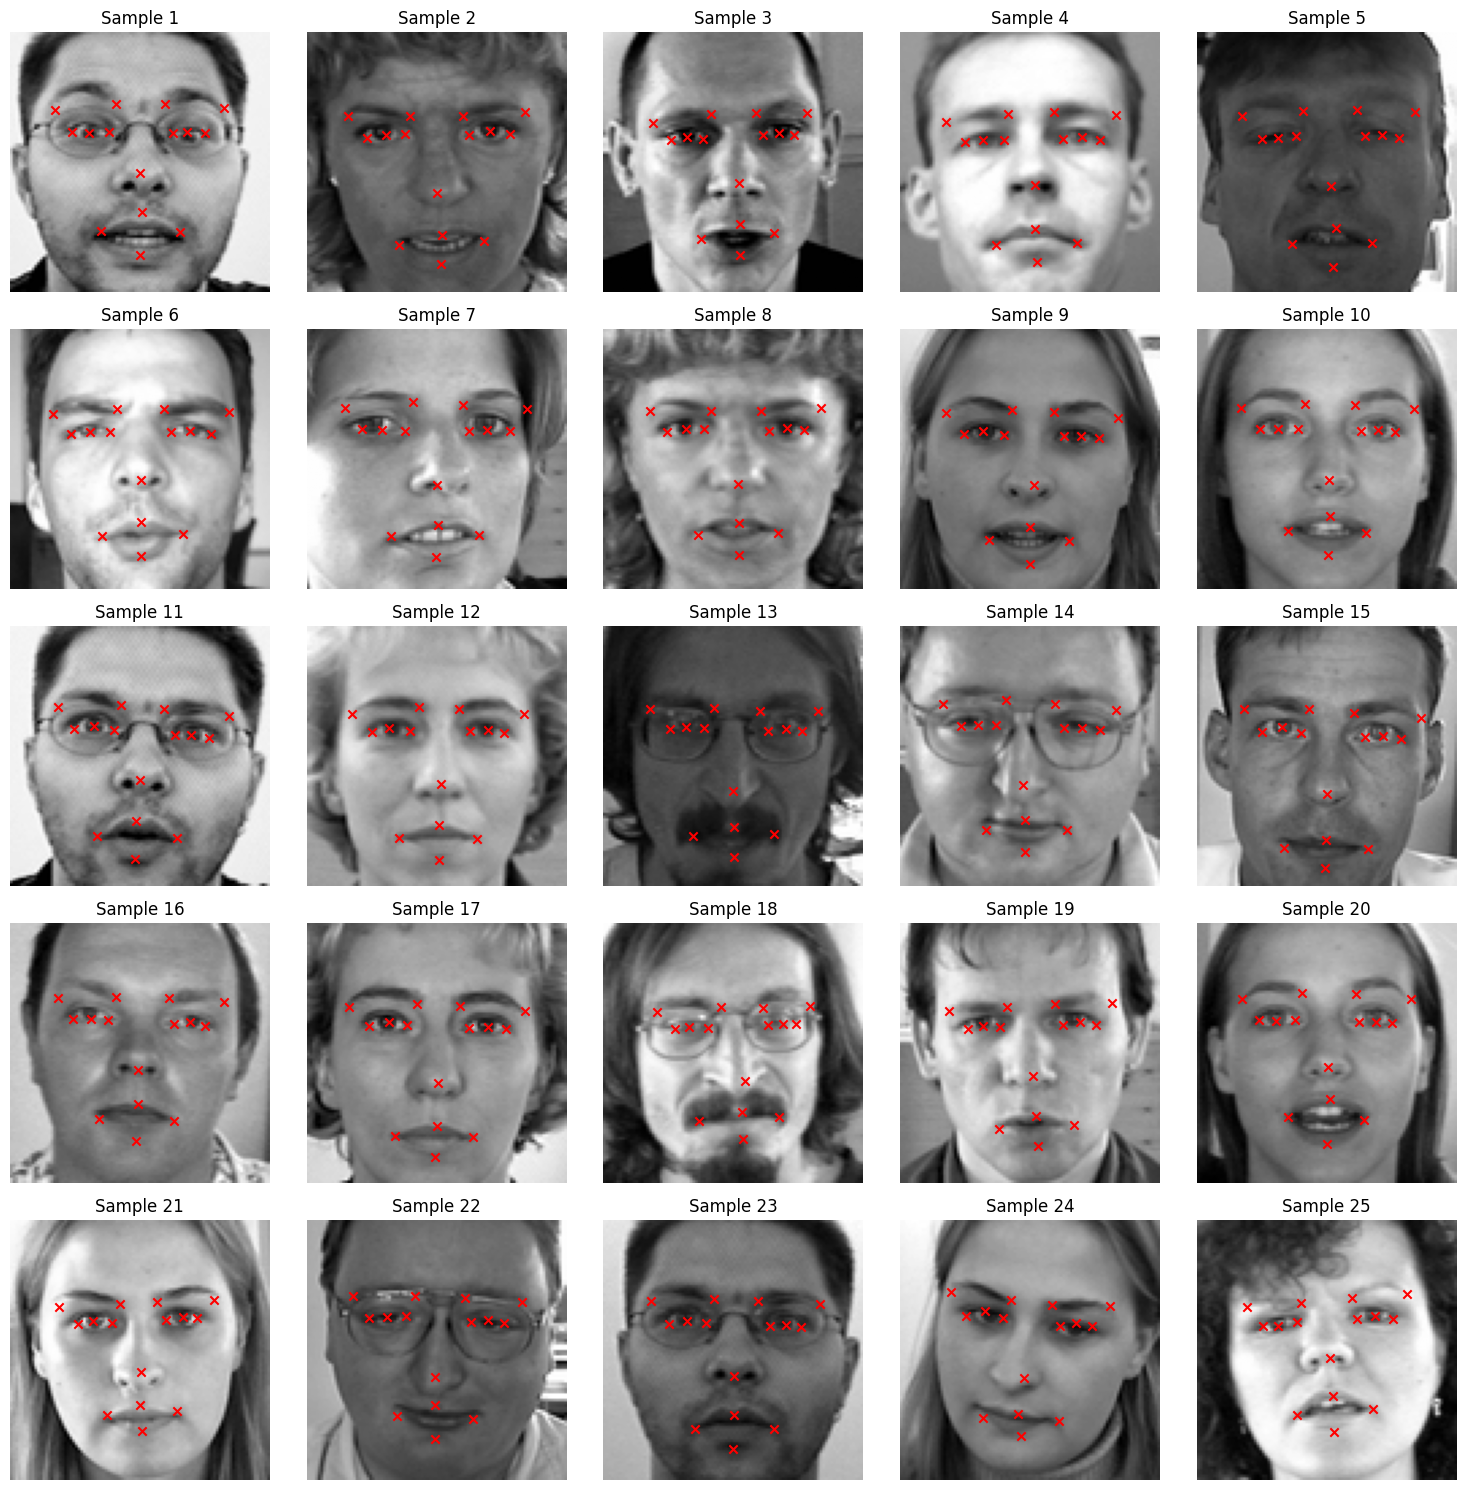

In [43]:
num_samples = 25  # Number of samples to visualize
rows, cols = 5, 5  # Layout configuration

plt.figure(figsize=(15, 15))
for i in range(num_samples):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_test[i].reshape(96, 96), cmap='gray')
    plt.scatter(pred[i][0::2] * 96 , pred[i][1::2] * 96, c='r' , marker='x')
    plt.title(f"Sample {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()